# This work is to demonstrate the trend and seasonal components in the sales data
## Installations required

In [ ]:
!/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip

In [ ]:
!pip install polars

In [ ]:
!pip install prophet

In [ ]:
!pip install plotly

In [ ]:
!pip install nbformat

In [ ]:
!pip install statsmodels

In [1]:
import polars as pl
import seaborn as sn
import plotly as plt

import pandas as pd
from prophet import Prophet

/Users/vjvelpula/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Sample Daily Data with Prophet (Internally uses sklearn)

In [40]:
df = pd.read_csv('data/Horlicks Data.csv')
df.head()

df2 = df[['Month', 'Week', 'GMV']]

In [41]:
# Sample Daily Data 
df3 = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df3.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [43]:
#We fit the model by instantiating a new Prophet object.
m = Prophet()
m.fit(df3)

#Predictions are then made on a dataframe with a column ds containing the dates for which a prediction is to be made.
future = m.make_future_dataframe(periods=365)
future.tail()

02:35:00 - cmdstanpy - INFO - Chain [1] start processing
02:35:02 - cmdstanpy - INFO - Chain [1] done processing


,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [45]:
#The predict method will assign each row in future a predicted value which it names yhat.
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.211654,7.492617,8.900086
3266,2017-01-16,8.536682,7.831434,9.279903
3267,2017-01-17,8.324099,7.578101,9.072184
3268,2017-01-18,8.156744,7.400712,8.858651
3269,2017-01-19,8.168699,7.485636,8.927262


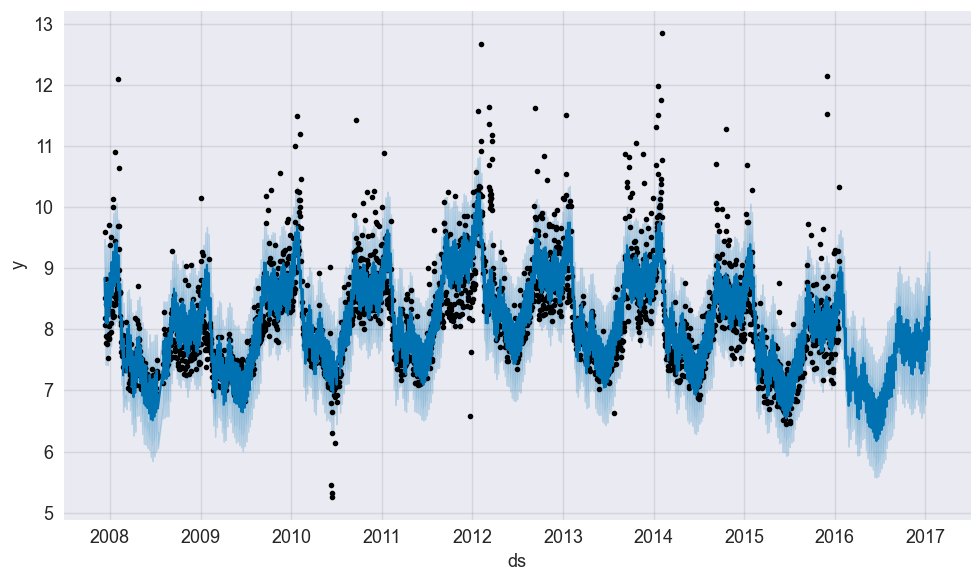

In [46]:

#plot the forecast
fig1 = m.plot(forecast)

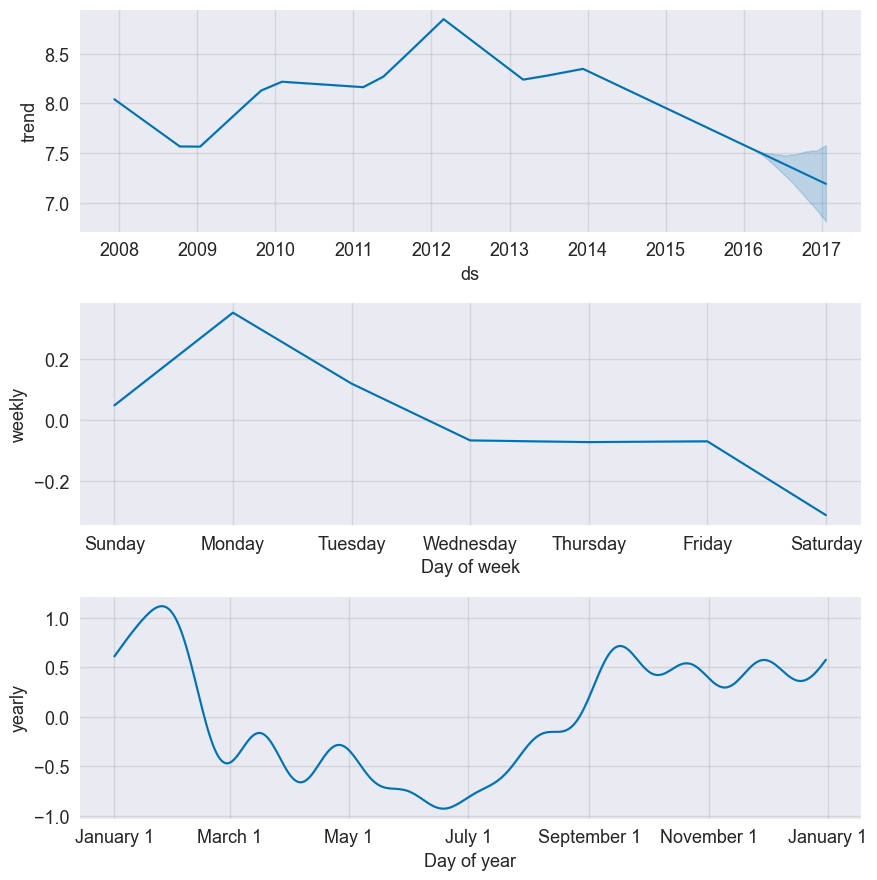

In [47]:
#To see the forecast components
fig2 = m.plot_components(forecast)


In [50]:
#More Interactive Visual with Plotly
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [51]:
plot_components_plotly(m, forecast)

In [52]:
# Validating the Prophet Model result

from prophet.diagnostics import cross_validation, performance_metrics

# Perform cross-validation with initial 365 days for the first training data and the cut-off for every 180 days.

df_cv = cross_validation(m, initial='365 days', period='180 days', horizon = '365 days')

# Calculate evaluation metrics
res = performance_metrics(df_cv)

res

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/13 [00:00<?, ?it/s]02:42:35 - cmdstanpy - INFO - Chain [1] start processing
02:42:35 - cmdstanpy - INFO - Chain [1] done processing
  8%|▊         | 1/13 [00:00<00:07,  1.60it/s]02:42:35 - cmdstanpy - INFO - Chain [1] start processing
02:42:35 - cmdstanpy - INFO - Chain [1] done processing
 15%|█▌        | 2/13 [00:01<00:06,  1.74it/s]02:42:36 - cmdstanpy - INFO - Chain [1] start processing
02:42:36 - cmdstanpy - INFO - Chain [1] done processing
 23%|██▎       | 3/13 [00:01<00:06,  1.66it/s]02:42:36 - cmdstanpy - INFO - Chain [1] start processing
02:42:37 - cmdstanpy - INFO - Chain [1] done processing
 31%|███       | 4/13 [00:02<00:05,  1.57it/s]02:42:37 - cmdstanpy - INFO - Chain [1] start processing
02:42:37 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 5/13 [00:03<00:05,  1.50it/s]02:42:38 - cmdstanpy - INFO - Chain [1] start processing
02:42:

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,0.481107,0.693619,0.509991,0.060247,0.051593,0.060952,0.659599
1,38 days,0.488317,0.698797,0.515707,0.060910,0.051593,0.061675,0.656640
2,39 days,0.509571,0.713842,0.523132,0.061717,0.051703,0.062604,0.652367
3,40 days,0.522414,0.722782,0.529956,0.062470,0.052053,0.063465,0.649737
4,41 days,0.531252,0.728870,0.532212,0.062712,0.051839,0.063788,0.656147
...,...,...,...,...,...,...,...,...
324,361 days,1.742586,1.320070,1.019316,0.119516,0.094691,0.122918,0.433939
325,362 days,1.756859,1.325465,1.025176,0.120077,0.094691,0.123486,0.431953
326,363 days,1.774632,1.332153,1.029888,0.120498,0.094627,0.123898,0.431460
327,364 days,1.788482,1.337342,1.034871,0.121098,0.095888,0.124431,0.428830


/Users/vjvelpula/Library/Python/3.9/lib/python/site-packages/prophet/plot.py:546: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.

/Users/vjvelpula/Library/Python/3.9/lib/python/site-packages/prophet/plot.py:547: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



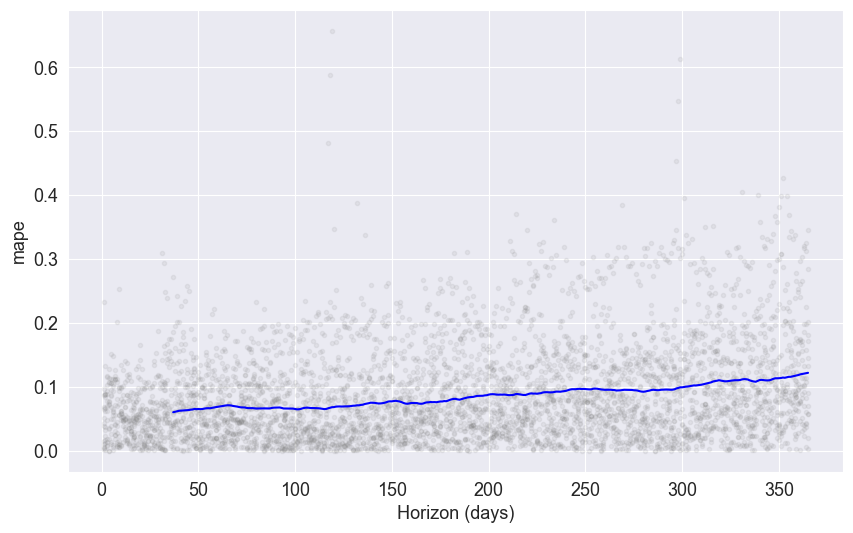

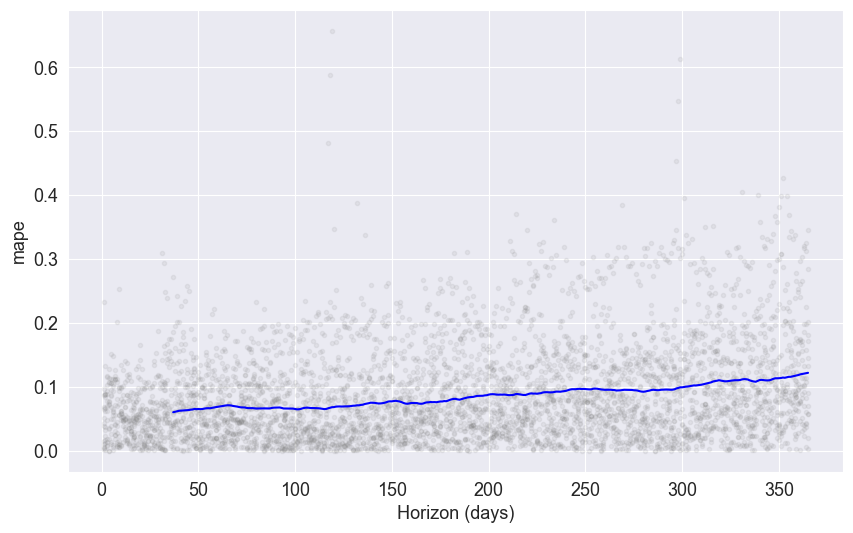

In [54]:
from prophet.plot import plot_cross_validation_metric
#choose between 'mse', 'rmse', 'mae', 'mape', 'coverage'

plot_cross_validation_metric(df_cv, metric= 'mape')

# Walmart Sales Data with StatsModels STL

In [2]:
walmart_data = pd.read_csv('data/Walmart_Sales.csv')
walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [24]:
walmart_data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
sns.set_style("darkgrid")

plt.rc("figure", figsize=(16, 12))
plt.rc("font", size=13)


<Axes: >

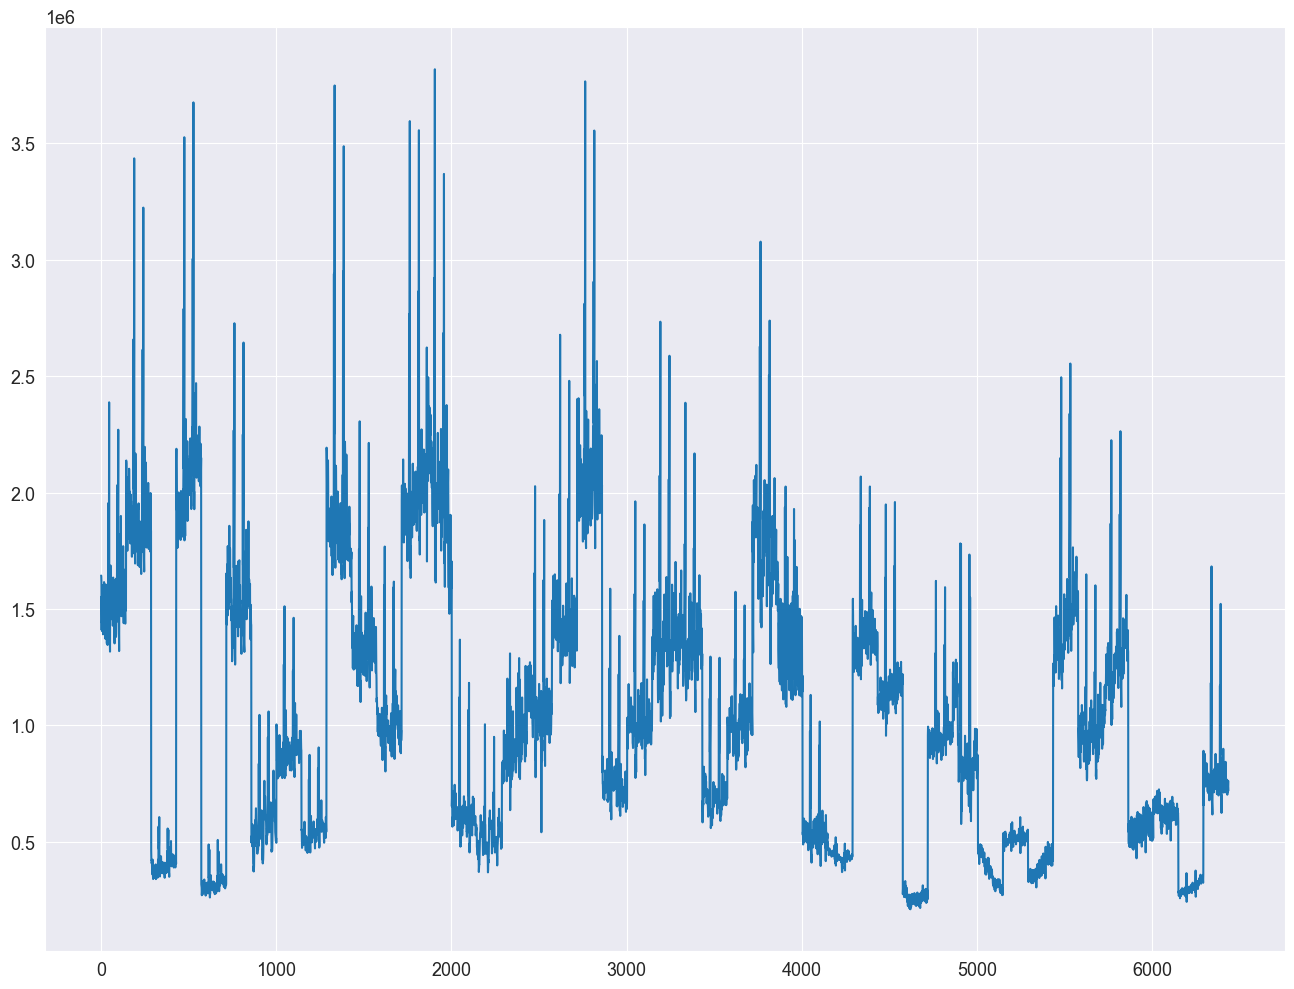

In [23]:
walmart_data['Weekly_Sales'].plot()

<Axes: >

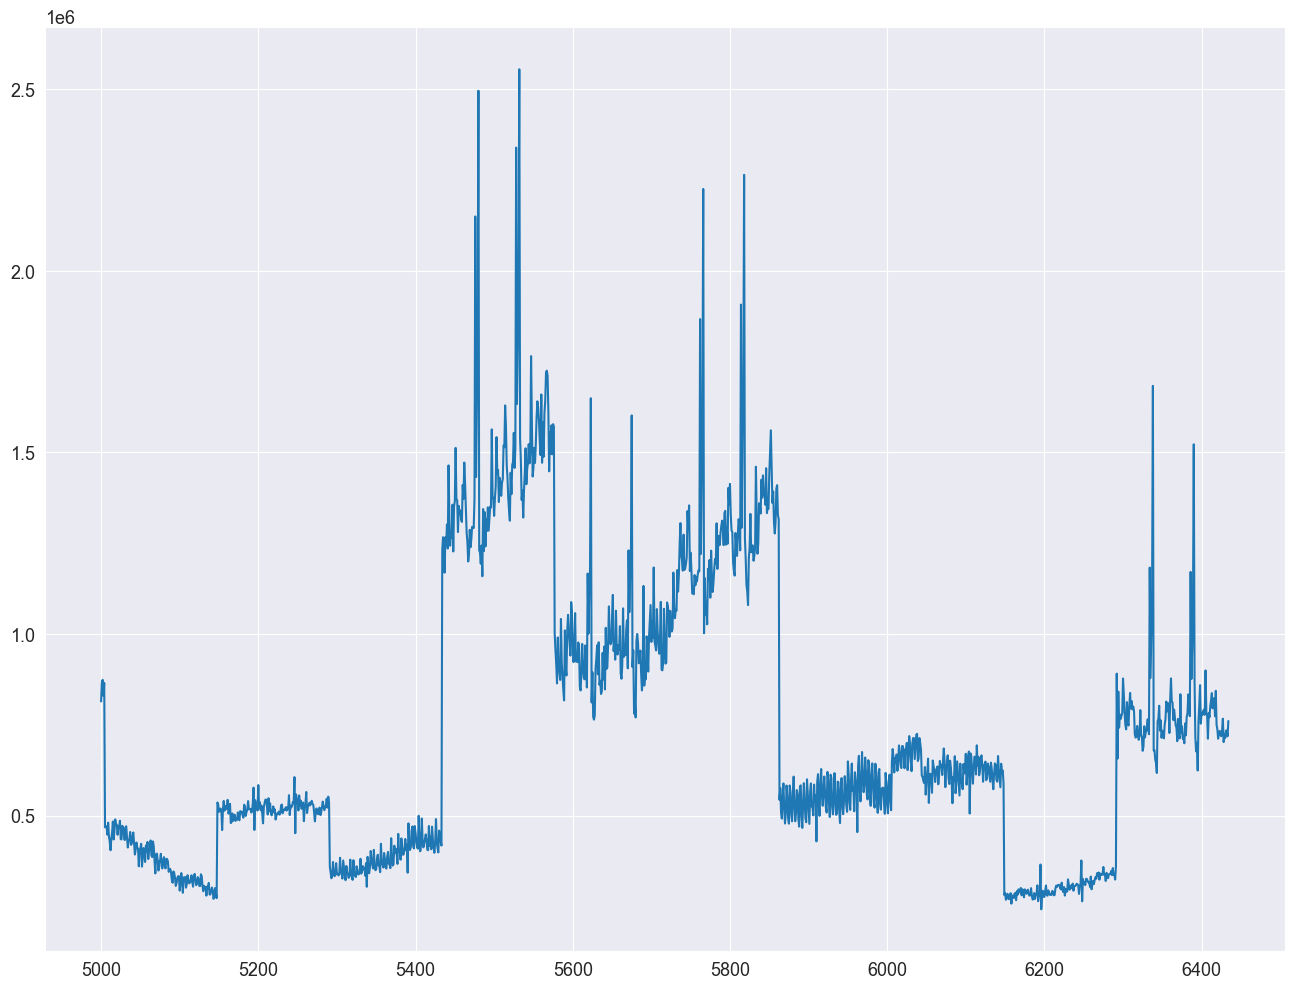

In [34]:
w_data = walmart_data[5000:]
w_data['Weekly_Sales'].plot()

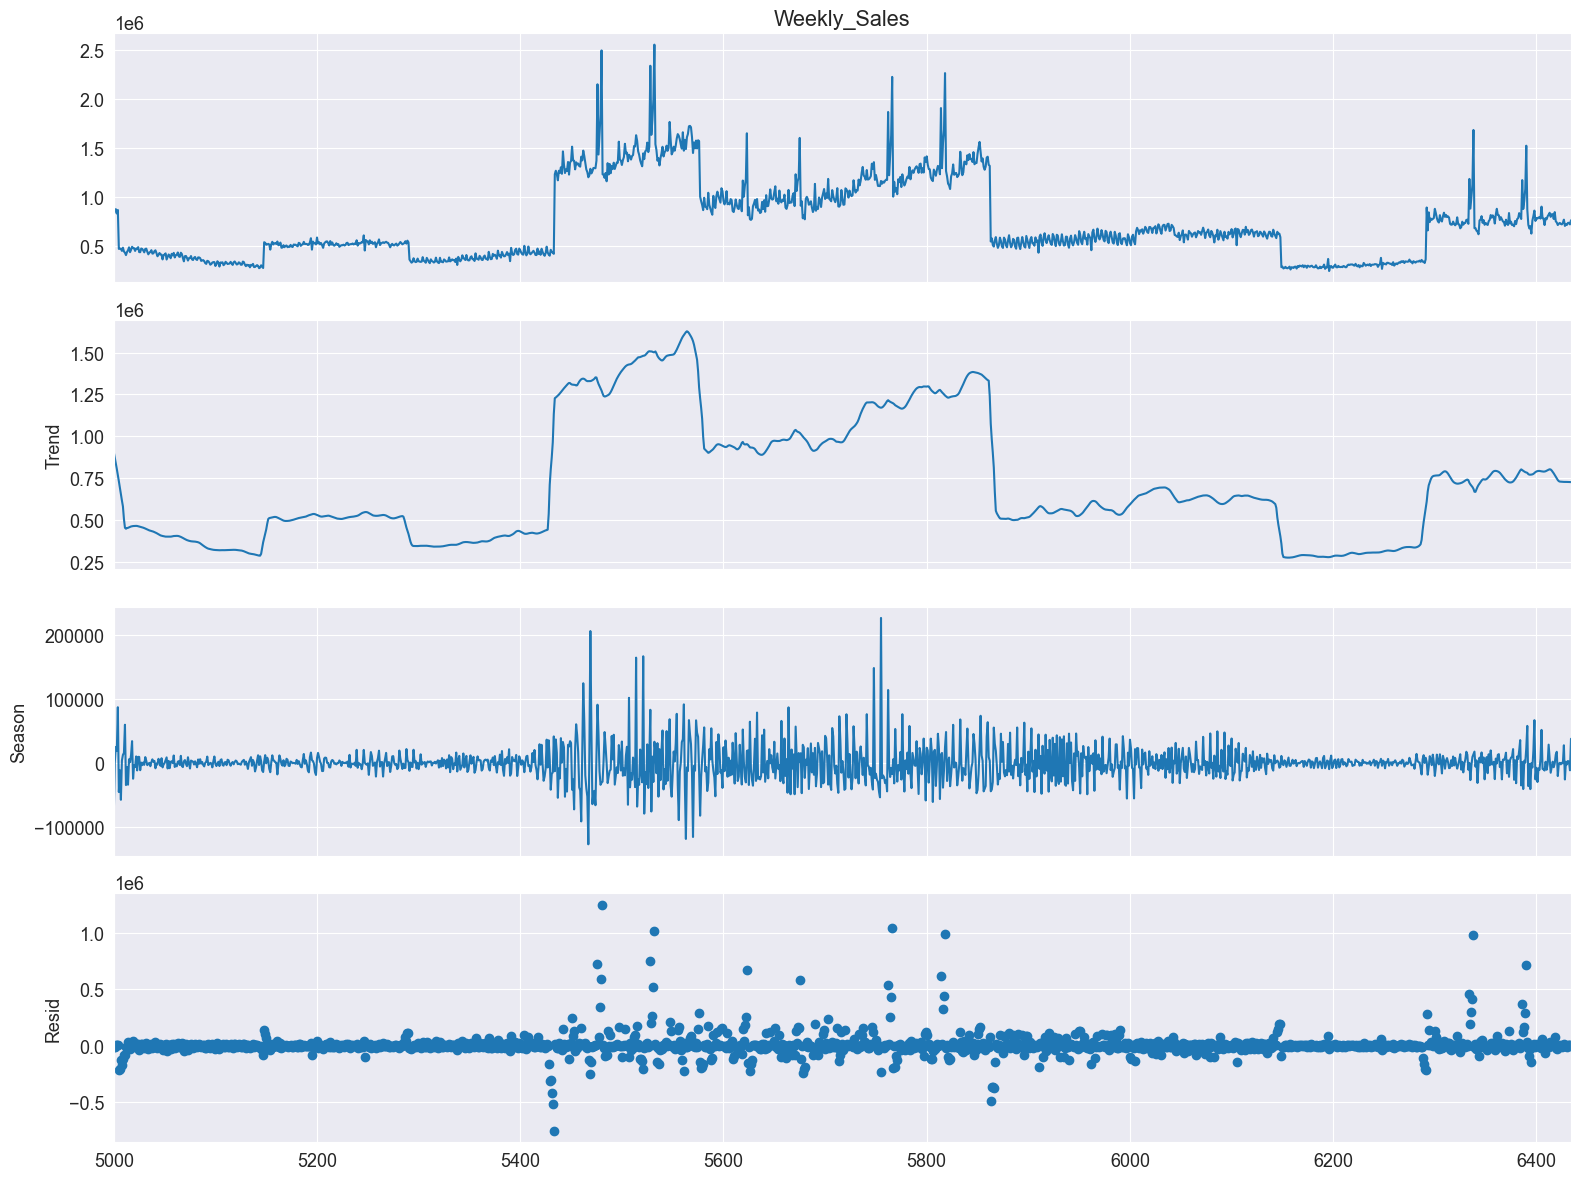

In [35]:
from statsmodels.tsa.seasonal import STL

stl = STL(w_data['Weekly_Sales'], period=7, robust=True)
res = stl.fit()
fig = res.plot()


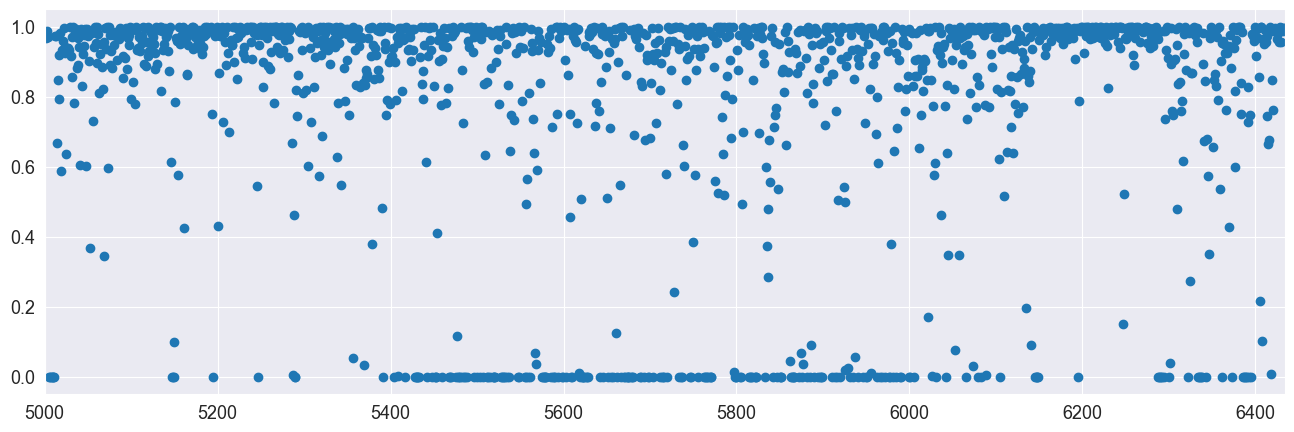

In [36]:
fig = plt.figure(figsize=(16, 5))
lines = plt.plot(res.weights, marker="o", linestyle="none")
ax = plt.gca()
xlim = ax.set_xlim(w_data['Weekly_Sales'].index[0], w_data['Weekly_Sales'].index[-1])


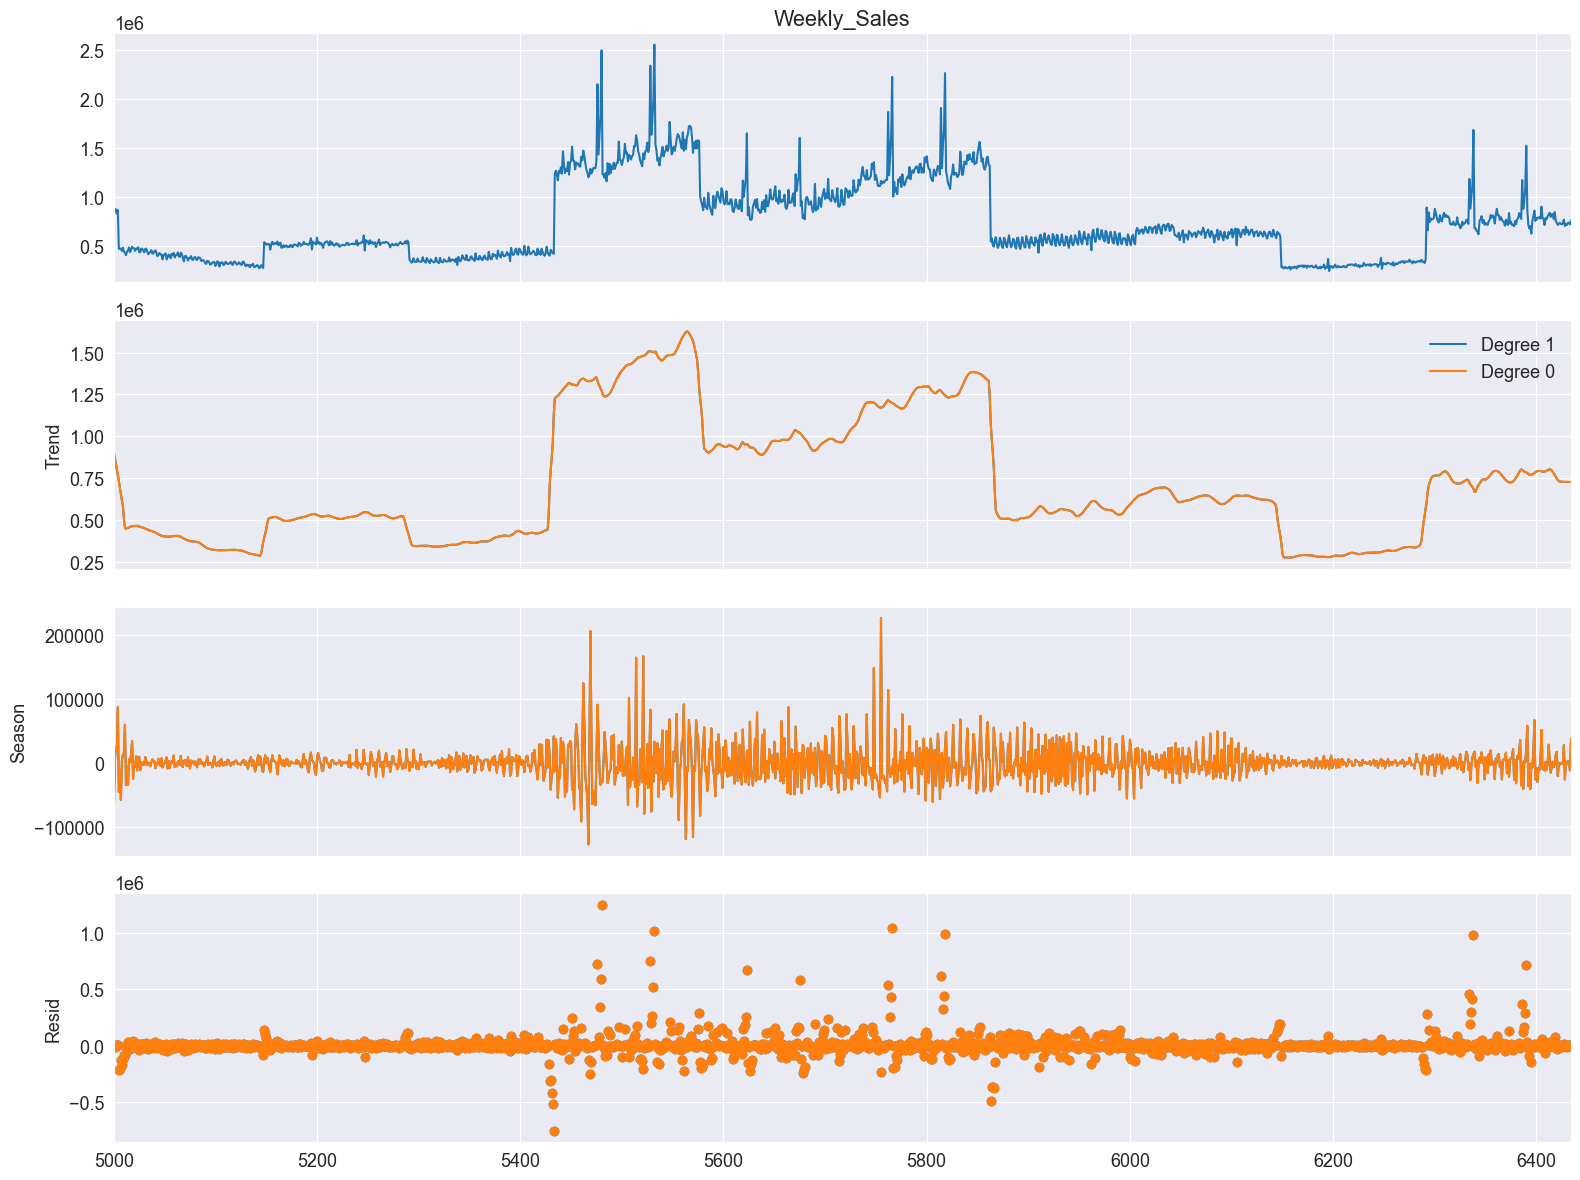

In [38]:
#LOESS degree
def add_stl_plot(fig, res, legend):
    """Add 3 plots from a second STL fit"""
    axs = fig.get_axes()
    comps = ["trend", "seasonal", "resid"]
    for ax, comp in zip(axs[1:], comps):
        series = getattr(res, comp)
        if comp == "resid":
            ax.plot(series, marker="o", linestyle="none")
        else:
            ax.plot(series)
            if comp == "trend":
                ax.legend(legend, frameon=False)
                
stl2 = STL(
    w_data['Weekly_Sales'], period=7, seasonal_deg=0, trend_deg=0, low_pass_deg=0, robust=True
)
res_deg_0 = stl.fit()
fig = res.plot()
add_stl_plot(fig, res_deg_0, ["Degree 1", "Degree 0"])


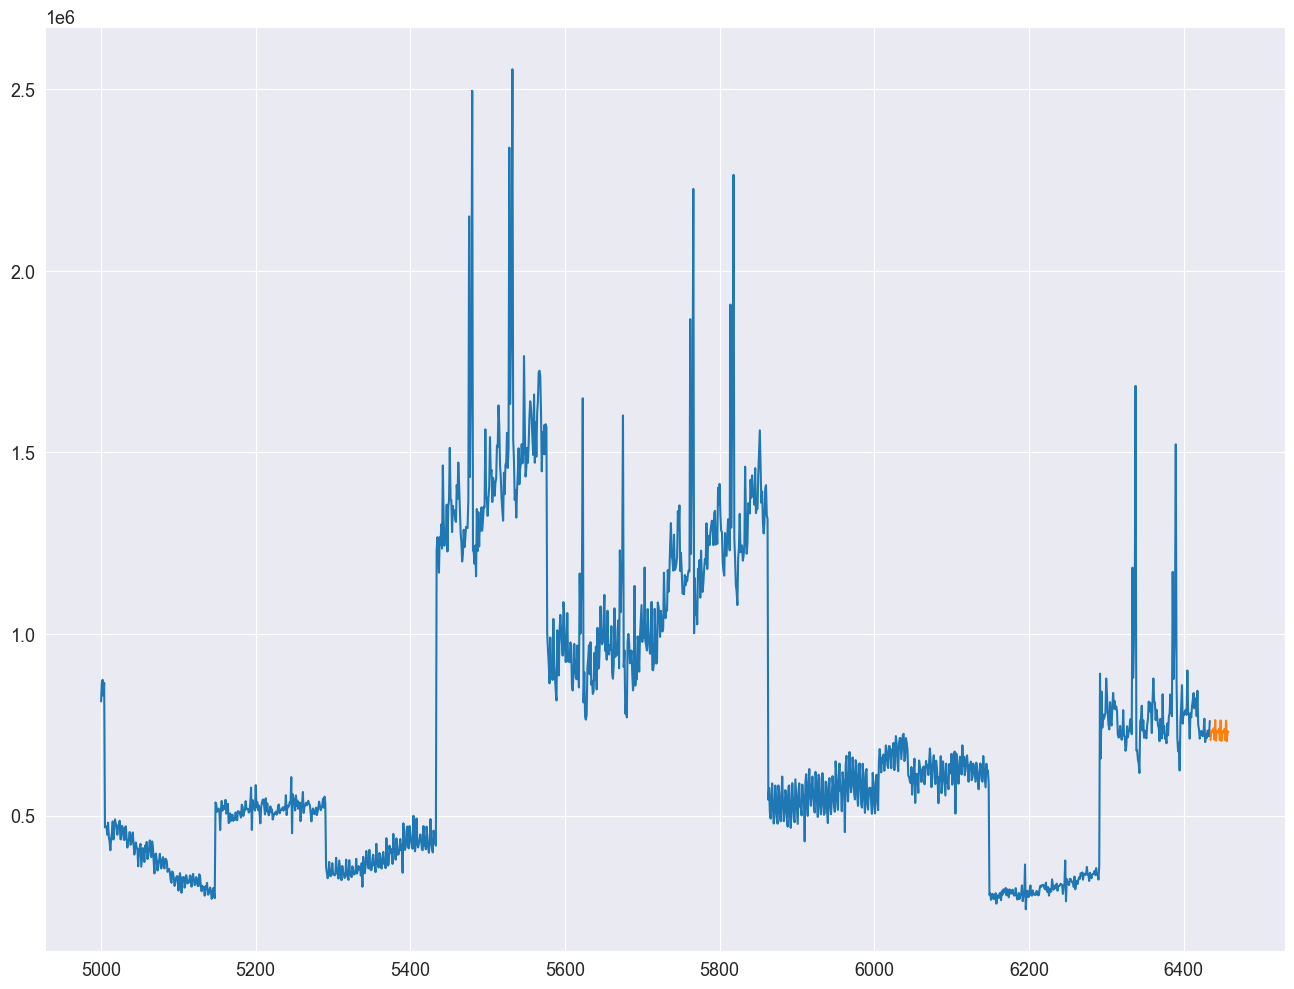

In [39]:
#Forecasting with Seasonality
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.forecasting.stl import STLForecast

df = w_data[['Weekly_Sales']].iloc[:, 0]

# df.index.freq = df.index.inferred_freq
stlf = STLForecast(df, ARIMA, model_kwargs=dict(order=(1, 1, 0), trend="t"), period=7)
stlf_res = stlf.fit()

forecast = stlf_res.forecast(24)
plt.plot(df)
plt.plot(forecast)
plt.show()


# Using PyMC 

In [ ]:
# Objective

# This notebook will:

# Illustrate the formulation of a standard MMM model without time variation.
# Extend the model to include a time component using HSGP.
# Compare the results and insights derived from both models, 
#     highlighting the importance of incorporating time variation in capturing the true impact of marketing activities.

In [58]:
import warnings

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import seaborn as sns

from pymc_marketing.mmm import MMM, GeometricAdstock, MichaelisMentenSaturation
from pymc_marketing.prior import Prior

warnings.filterwarnings("ignore")

az.style.use("arviz-darkgrid")
plt.rcParams["figure.figsize"] = [12, 7]
plt.rcParams["figure.dpi"] = 100

%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "retina"

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


ImportError: cannot import name 'GeometricAdstock' from 'pymc_marketing.mmm' (/Users/vjvelpula/Library/Python/3.9/lib/python/site-packages/pymc_marketing/mmm/__init__.py)

In [55]:
#Data Generation
#==============================

# Creating variables
import numpy as np

seed: int = sum(map(ord, "Time Media Contributions are amazing"))
rng: np.random.Generator = np.random.default_rng(seed=seed)

# date range
min_date = pd.to_datetime("2018-04-01")
max_date = pd.to_datetime("2021-09-01")

df = pd.DataFrame(
    data={"date_week": pd.date_range(start=min_date, end=max_date, freq="W-MON")}
).assign(
    year=lambda x: x["date_week"].dt.year,
    month=lambda x: x["date_week"].dt.month,
    dayofyear=lambda x: x["date_week"].dt.dayofyear,
)

n = df.shape[0]
print(f"Number of observations: {n}")

Number of observations: 179


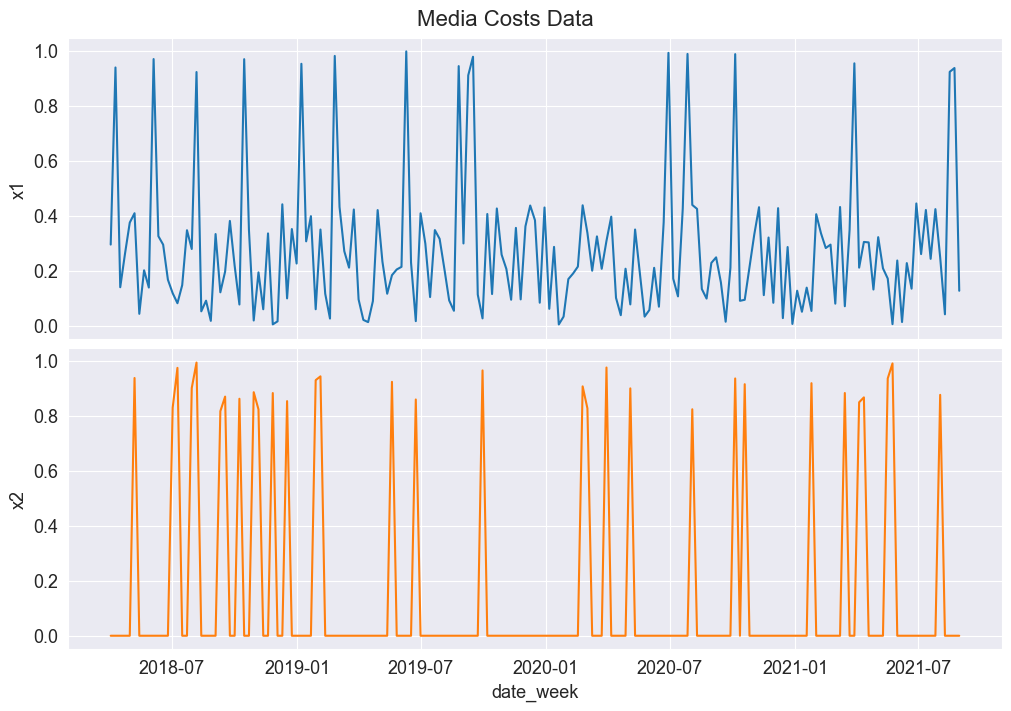

In [56]:
# Media Costs
#By design, should resemble a typical paid social channel and a offline (e.g. TV) spend time series.
 
x1 = rng.uniform(low=0.0, high=1.0, size=n)
df["x1"] = np.where(x1 > 0.9, x1, x1 / 2)

x2 = rng.uniform(low=0.0, high=1.0, size=n)
df["x2"] = np.where(x2 > 0.8, x2, 0)

fig, ax = plt.subplots(
    nrows=2, ncols=1, figsize=(10, 7), sharex=True, sharey=True, layout="constrained"
)
sns.lineplot(x="date_week", y="x1", data=df, color="C0", ax=ax[0])
sns.lineplot(x="date_week", y="x2", data=df, color="C1", ax=ax[1])
ax[1].set(xlabel="date_week")
fig.suptitle("Media Costs Data", fontsize=16);

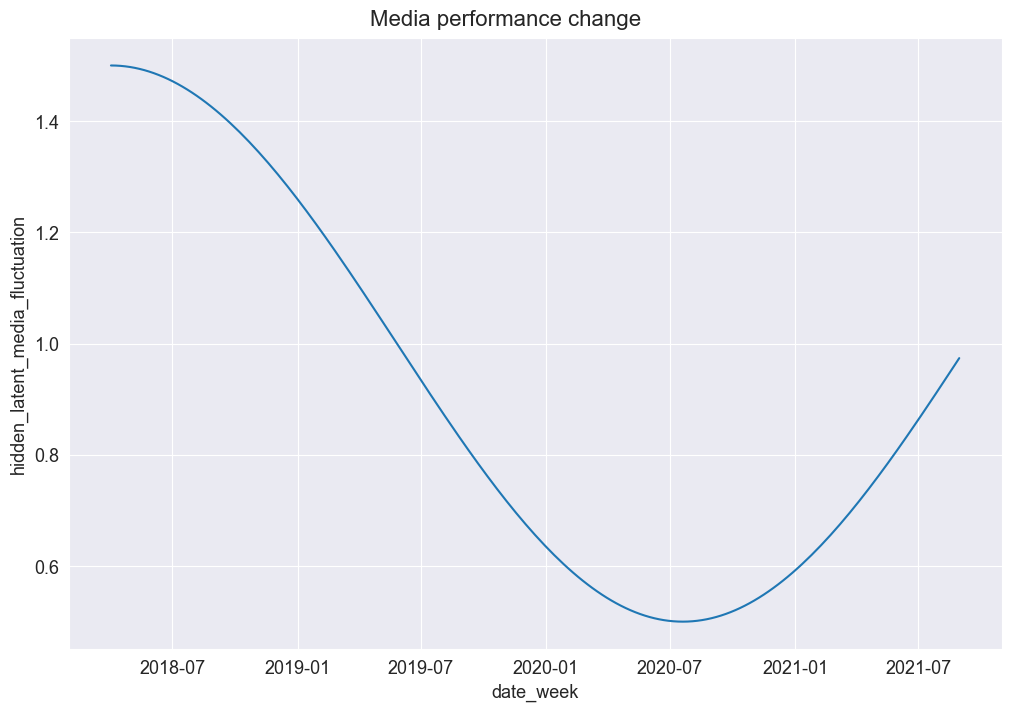

In [57]:
# Adding two control / promo variables
df["event_1"] = (df["date_week"] == "2019-05-13").astype(float)
df["event_2"] = (df["date_week"] == "2020-09-14").astype(float)

# Time varying media performance
# This signal, hidden_latent_media_fluctuation, is designed to simulate the natural fluctuations in media performance over time.
df["hidden_latent_media_fluctuation"] = (
    np.cos(0.5 * np.pi / 60 * np.arange(n)) / 2 + 1
) * 1

fig, ax = plt.subplots(
    nrows=1, ncols=1, figsize=(10, 7), sharex=True, sharey=True, layout="constrained"
)
sns.lineplot(x="date_week", y="hidden_latent_media_fluctuation", data=df, color="C0")
ax.set(xlabel="date_week")
fig.suptitle("Media performance change", fontsize=16);
#This synthetic signal is essential for demonstrating the efficacy of our time-dependent MMM model, which should recover this signal as much as possible.

In [ ]:
# Here are the true parameter values used in our model:

# Intercept: 6.0
# Adstock Alpha: [0.5, 0.4] (for two different media channels)
# Saturation Alpha: [3, 5] (for two different media channels)
# Saturation Lambda: [0.3, 0.5] (for two different media channels)
# Media Temporal Latent Multiplier: The time-varying signal hidden_latent_media_fluctuation from our dataset
# Gamma Fourier: [2.5, -0.5, 1.5, 2.5] (coefficients for Fourier terms)
# Y Sigma: 0.25 (Noise)
# Gamma Control: [-3.5, 6.25] (coefficients for control events, e.g., event1 and event2)


In [ ]:
# Target Variable
adstock_max_lag = 8
yearly_seasonality = 2

dummy_mmm = MMM(
    date_column="date_week",
    channel_columns=["x1", "x2"],
    control_columns=["event_1", "event_2"],
    yearly_seasonality=yearly_seasonality,
    adstock=GeometricAdstock(l_max=adstock_max_lag),
    saturation=MichaelisMentenSaturation(),
    time_varying_media=True,
)

df["init_target"] = 0
dummy_mmm.build_model(df.drop(columns=["init_target"]), df["init_target"])

# Model to graphiz
pm.model_to_graphviz(dummy_mmm.model)

In [ ]:
# Real values
real_alpha = [3, 5]
real_lam = [0.3, 0.5]

true_params = {
    "intercept": 6.0,
    "adstock_alpha": np.array([0.5, 0.4]),
    "saturation_alpha": np.array(real_alpha),
    "saturation_lam": np.array(real_lam),
    "media_temporal_latent_multiplier": df["hidden_latent_media_fluctuation"],
    "gamma_fourier": np.array(
        [
            2.5,
            -0.5,
            1.5,
            2.5,
        ]
    ),
    "y_sigma": 0.25,
    "gamma_control": np.array([-3.5, 6.25]),
}